# 朝倉書店「医学への統計学」5章 平均値に関する推測

例題をJuliaを使って解いてみる。

In [2]:
using Distributions
using HypothesisTests
using Plots

## 例題5.1

腎機能障害の患者6名の血清クレアチニン濃度（mg/dl）を測定しデータを得た。この疾患の血清クレアチニン濃度の母平均の95%信頼区間を求めよ。

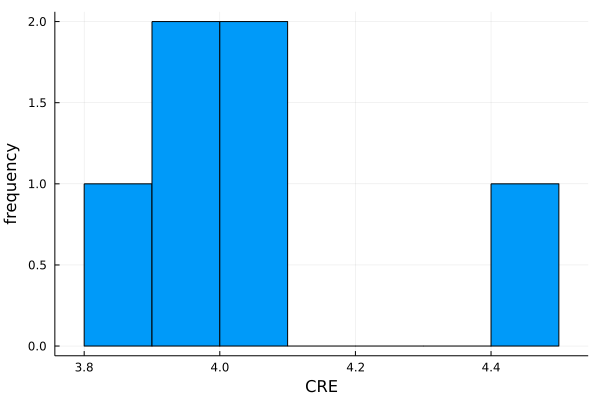

In [78]:
data = [4.0, 3.9, 3.8, 4.0, 4.4, 3.9]
histogram(data, xlabel="CRE", ylabel="frequency",　label=:none)

正規分布に従うと考え、自由度n-1のt分布より95%信頼区間を計算する。

In [87]:
xbar = mean(data)
n = length(data)
s = std(data)
α = 0.05
t = quantile(TDist(n-1), α/2)
println("Manually calculated 95% confidence intervals: ", (xbar - t * s/√n, xbar + t * s/√n))
confint(OneSampleTTest(xbar, s, n), α)

Manually calculated 95% confidence intervals: (4.220131476941603, 3.779868523058397)


(3.779868523058397, 4.220131476941603)

## 例題5.2

あるタイプの肝炎疾患11名のアルカリフォスファターゼ値（IU/l）のデータを得た。このタイプの肝疾患のALP値の母平均の95%信頼区間を求めよ。

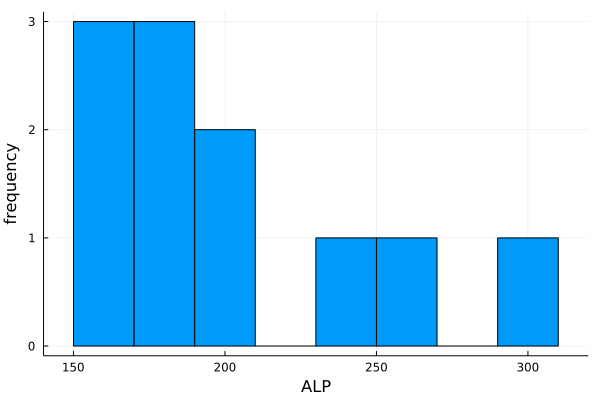

In [80]:
data = [206, 235, 155, 169, 180, 199, 151, 172, 291, 182, 260]
histogram(data, bins=150:20:310, xlabel="ALP", ylabel="frequency", label=:none)

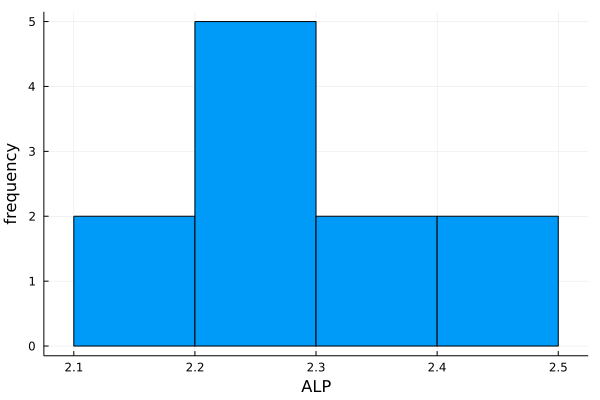

In [81]:
histogram(log10.(data), xlabel="ALP", ylabel="frequency", label=:none)

対数を取った値は正規分布を示すため、対数変換した値に対して自由度n-1のt分布より95%信頼区間を計算する。

In [82]:
log10_CI95 = confint(OneSampleTTest(log10.(data)); level=0.95, tail=:both)

(2.230229134495169, 2.3535385357012646)

$Y = log_{10}X$の逆変換、$X = 10^Y$を用いて$\mu$の95%信頼区間を計算する。

In [83]:
lower = round(10^log10_CI95[1], digits=1)
upper = round(10^log10_CI95[2], digits=1)
println("$lower ≦ μ ≦ $upper")

169.9 ≦ μ ≦ 225.7


In [84]:
# 対数変換しなかった場合
CI95 = confint(OneSampleTTest(data); level=0.95, tail=:both)
lower = round(CI95[1], digits=1)
upper = round(CI95[2], digits=1)
println("$lower ≦ μ ≦ $upper")    # 信頼区間の上限が大きくなってしまう

169.9 ≦ μ ≦ 230.1


## 例題5.3

例題5.1において、別の病院のおける、同じ腎機能障害の血清クレアチニン濃度の平均値は4.3mg/dlであった。測定法は同じとし、二つの病院を受診した患者の層に違いは認められるか求めよ。

$$
  H_0: \mu = \mu_0 \\
  H_1: \mu \ne \mu_0
$$

In [90]:
data = [4.0, 3.9, 3.8, 4.0, 4.4, 3.9]

xbar = mean(X)
n = length(X)
s = std(X)
μ0 = 4.3
t_statistic = abs((xbar - μ0) / (s/√n))  # 両側検定
p_val = 2*ccdf(TDist(n-1), abs(t_statistic))

println("Manually calculated test statistic: ", round(t_statistic, digits=3))
println("Manually calculated p-value: ", round(p_val, digits=3))
OneSampleTTest(data, μ0)

Manually calculated test statistic: 3.503
Manually calculated p-value: 0.017


One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         4.3
    point estimate:          4.0
    95% confidence interval: (3.78, 4.22)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0172

Details:
    number of observations:   6
    t-statistic:              -3.503245248726848
    degrees of freedom:       5
    empirical standard error: 0.0856348838577676


従って、有意水準5%で有意差が認められる。

## 例題5.4

例題5.2において、別のタイプの肝炎患者のALP値は過去の症例から平均値が226（IU/l）であることがわかっている。二つのタイム間に差があるといえるか求めよ。

In [94]:
data = [206, 235, 155, 169, 180, 199, 151, 172, 291, 182, 260]
μ0 = 226
OneSampleTTest(log10.(data), log10(μ0))

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         2.35411
    point estimate:          2.29188
    95% confidence interval: (2.23, 2.354)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0483

Details:
    number of observations:   11
    t-statistic:              -2.2487345891773862
    degrees of freedom:       10
    empirical standard error: 0.027670941848209202
